In [1]:
import pickle, blosc, time, sys, os, anim
from csv_load import *
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import median_filter
from scipy.signal import medfilt

### Compressing the flickering files - the 2nd groupe of files

In [2]:
pickledir = "../files/pickles/2/"
DIR = "../files/utf8_2/"
FILES = []
for root, dir, files in os.walk(DIR, topdown=False):
    for file in sorted(files):
        FILES.append(os.path.join(root, file))

for f in FILES:
    print("Compressing file : ", f, end="              ")
    data = extract_dataframes(f, set=2)
    print("File contains {} trials".format(len(data)))
    pickled_data = pickle.dumps(data)  # returns data as a bytes object
    compressed_pickle = blosc.compress(pickled_data)
    with open(pickledir+f[16:-4]+".pickle", "wb") as f:
        f.write(compressed_pickle)


Compressing file :  ../files/utf8_2/Ball_on_Bar_-_Child_-_RIGHT_-_10_21.csv              File contains 1 trials
Compressing file :  ../files/utf8_2/Ball_on_Bar_-_Child_-_RIGHT_-_10_25.csv              File contains 1 trials
Compressing file :  ../files/utf8_2/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(olderchilden)]_-_RIGHT_-_10_36.csv              File contains 1 trials
Compressing file :  ../files/utf8_2/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_10_33.csv              File contains 1 trials
Compressing file :  ../files/utf8_2/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_10_34.csv              File contains 1 trials
Compressing file :  ../files/utf8_2/Circuit_Exo_-_[b_Circuit1_(olderchildren)]_-_RIGHT_-_10_37.csv              File contains 1 trials
Compressing file :  ../files/utf8_2/Circuit_Exo_-_[c_Circuit1_rotated_(olderchildren)]_-_RIGHT_-_10_38.csv              File contains 1 trials
Compressing file :  ../files/utf8_2/Object_Hit_-_Ch

# Loading the files
IMPORTANT NOTE: only a couple of files of Visually guided experiments are uploaded in Github due to the size of the files.  
One contains only a single trial in it.  The other contains 9 (short) trials.  

In [3]:
def df_gap(df):
    """ takes a dataframe in input (required to have the GazeX column) and measures all the NaNs Gaps in the given df.
        the first part of the returned tuple contains a list of successive gaps length, 
        the second part contains start and end coordinates of the gaps
    """
    df_sub = df.loc[df['Gaze_X'].isna()]
    arridx = list(df_sub.index) #array containing the NA indexes
    if len(arridx) > 0:
        array = [arridx[0]]
        for i,j in enumerate(arridx[:-1]):
            if arridx[i]+1 != arridx[i+1]:
                array.append(j)
                array.append(arridx[i+1])

        array.append(arridx[-1]) #includes the last element 

        na_array = []
        for i in range(1, len(array), 2):
            #print(i)
            na_array.append(array[i]-array[i-1]+1)
    else: na_array, array = [],[]
    
    #print(na_array, array[::2]) used to print only starting points
    return na_array, array #used to print start/end

In [4]:
def df_split(df, gap_size = 15):
    """ aim: remove large gaps, gapi_size is the threshold value
        returns: splitted df / or just numbered (add column)
    """
    # usable for the function above
    _, splits = df_gap(df)
    na_starts = splits[::2]
    dfs = []
    for i, row in enumerate(splits[:-1]):
        dfs.append(df.loc[row:splits[i+1]])
        #print(df.loc[splits[i]:splits[i+1]])
        #print(len(df.loc[splits[i]:splits[i+1]]))
        #print(row)
        #     df['R'] == i
    
    # for i in range(1, len(splits), 2):
    #     print("{}: {}".format(splits[i-1], splits[i]-splits[i-1]))
    # return splits

    return dfs[::2]
    #print(splits)
    #return df.loc[splits[1]]
    #return (len(splits))
    

## First measures of gaps
The last line of the loop can be uncommented for a detail of the lengths of the gaps for each trial

In [5]:
DIR = "../files/pickles/2"
FILES = []
for root, dir, files in os.walk(DIR, topdown=False):
    for file in sorted(files):
        FILES.append(os.path.join(root, file))

# Median filter window sizes to test
#FILTERS = [7]#, 150, 500]

for f in FILES:
    print("File : ", f, end="\t")
    with open(f, "rb") as f:
        compressed_pickle = f.read()
        depressed_pickle = blosc.decompress(compressed_pickle)
        dataframes = pickle.loads(depressed_pickle)
        print("Object contains {} dataframes.".format(len(dataframes)))
        for i in range(len(dataframes)):
            nummed_df = df_split(dataframes[i])
            gaps = [len(i) for i in nummed_df]
            print("Trial {}: {} NaNs gaps detected ".format(i,len(gaps)))
            #print("Gaps sizes : ", gaps)

File :  ../files/pickles/2/Ball_on_Bar_-_Child_-_RIGHT_-_10_21.pickle	Object contains 1 dataframes.
Trial 0: 187 NaNs gaps detected 
File :  ../files/pickles/2/Ball_on_Bar_-_Child_-_RIGHT_-_10_25.pickle	Object contains 1 dataframes.
Trial 0: 56 NaNs gaps detected 
File :  ../files/pickles/2/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(olderchilden)]_-_RIGHT_-_10_36.pickle	Object contains 1 dataframes.
Trial 0: 59 NaNs gaps detected 
File :  ../files/pickles/2/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_10_33.pickle	Object contains 1 dataframes.
Trial 0: 87 NaNs gaps detected 
File :  ../files/pickles/2/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_10_34.pickle	Object contains 1 dataframes.
Trial 0: 67 NaNs gaps detected 
File :  ../files/pickles/2/Circuit_Exo_-_[b_Circuit1_(olderchildren)]_-_RIGHT_-_10_37.pickle	Object contains 1 dataframes.
Trial 0: 99 NaNs gaps detected 
File :  ../files/pickles/2/Circuit_Exo_-_[c_Circuit1_rotated_(olderchildr

Further animations and plots are done with the **anim_showcase2.py** script

## Checking for the amount of missing values

In [6]:
file1 = "../files/pickles/2/Visually_Guided_Reaching_-_Child__4_target_-_LEFT_-_10_06.pickle"
file2 = "../files/pickles/2/Visually_Guided_Reaching_-_Child__4_target_-_LEFT_-_10_07.pickle"
with open(file1, "rb") as f1, open(file2, "rb") as f2:
        depressed_pickle1, depressed_pickle2 = blosc.decompress(f1.read()), blosc.decompress(f2.read())
        dataframe1, dataframe2 = pickle.loads(depressed_pickle1), pickle.loads(depressed_pickle2)

In [7]:
def check_na(df):
    """ Creates a simple dataframe to mesure the NANs values proportion
    """
    trials, nax, nay, lengths, percents = [], [], [], [], []
    for i in range(len(df)):
        trials.append(i)
        na_X, na_Y =  df[i]['Gaze_X'].isna().sum(), df[i]['Gaze_Y'].isna().sum()
        nax.append(na_X), nay.append(na_Y)
        lengths.append(len(df[i]))
        percents.append(round(na_X / len(df[i]) * 100, 2))
    d = {'Trial': trials, 'Na X': nax, 'Na Y': nay, 'Total': lengths ,'Na %': percents}
    df_na = pd.DataFrame(d)
    return df_na.set_index('Trial')

Mean of missing values for the file1: 

In [8]:
df_recap = check_na(dataframe1)
print("% of NANs values over the complete file : ", df_recap['Na %'].mean())
df_recap

% of NANs values over the complete file :  16.85


,Na X,Na Y,Total,Na %
Trial,,,,
0,798,798,4736,16.85


Mean of missing values for the file2: (which contains 9 trials)

In [9]:
check_na(dataframe2)

,Na X,Na Y,Total,Na %
Trial,,,,
0,543,543,3353,16.19
1,980,980,8414,11.65
2,539,539,5857,9.20
3,1132,1132,4838,23.40
4,1299,1299,8258,15.73
5,654,654,6666,9.81
6,2355,2355,8880,26.52
7,200,200,1269,15.76
8,210,210,2586,8.12


## Statistics of the gaps
Data and code used for Table 1 of the paper

In [10]:
gaps_meanslist = []
maxes = []
c = 0
for d in dataframe2:
    gaps, _ = df_gap(d)
    gaps_meanslist.append(round(np.mean(gaps),0))
    print('Trial {} Gaps detected : {}'.format(c,gaps))
    print('Total df len : {}. Total length of gaps : {}'.format(len(d), np.sum(gaps)), end='\n _________ \n')
    maxes.append(max(gaps))
    c +=1

Trial 0 Gaps detected : [281, 14, 248]
Total df len : 3353. Total length of gaps : 543
 _________ 
Trial 1 Gaps detected : [36, 2, 294, 10, 318, 12, 4, 144, 158, 2]
Total df len : 8414. Total length of gaps : 980
 _________ 
Trial 2 Gaps detected : [192, 190, 4, 12, 24, 89, 15, 7, 6]
Total df len : 5857. Total length of gaps : 539
 _________ 
Trial 3 Gaps detected : [126, 26, 12, 214, 170, 576, 2, 4, 2]
Total df len : 4838. Total length of gaps : 1132
 _________ 
Trial 4 Gaps detected : [6, 10, 16, 16, 2, 150, 10, 9, 3, 3, 3, 6, 6, 73, 6, 5, 5, 196, 2, 2, 4, 20, 84, 14, 22, 142, 2, 4, 228, 70, 6, 174]
Total df len : 8258. Total length of gaps : 1299
 _________ 
Trial 5 Gaps detected : [175, 192, 8, 4, 6, 6, 4, 8, 29, 222]
Total df len : 6666. Total length of gaps : 654
 _________ 
Trial 6 Gaps detected : [4, 2, 2, 4, 10, 2, 8, 2, 4, 2, 4, 6, 4, 12, 8, 496, 2, 2, 10, 10, 22, 18, 2, 4, 30, 32, 18, 1051, 12, 168, 34, 186, 32, 121, 11, 20]
Total df len : 8880. Total length of gaps : 2355
 

In [11]:
print('Means of the gaps for each trials : ',gaps_meanslist)
print('General mean for this file :', np.mean(gaps_meanslist), end = '\t')
print('Std:', np.std(gaps_meanslist))
print('Maximum gaps length for this file :')
print(maxes, np.mean(maxes), np.std(maxes))

Means of the gaps for each trials :  [181.0, 98.0, 60.0, 126.0, 41.0, 65.0, 65.0, 200.0, 210.0]
General mean for this file : 116.22222222222223	Std: 61.91710906576411
Maximum gaps length for this file :
[281, 318, 192, 576, 228, 222, 1051, 200, 210] 364.22222222222223 267.6593098938266


## Other table and plots

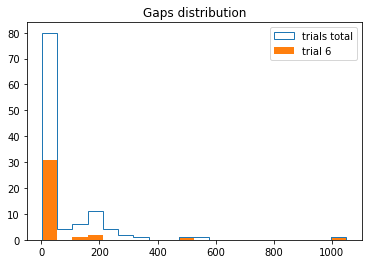

In [12]:
gaps_tot = []
for d in dataframe2:
    gaps, _ = df_gap(d)
    gaps_tot += gaps
gaps_test, _ = df_gap(dataframe2[6])

plt.title('Gaps distribution')
plt.hist(gaps_tot, bins=20, label= 'trials total', histtype='step', log = False)
plt.hist(gaps_test, bins=20, label='trial 6', log = False)
plt.legend()
#plt.savefig('./images/nans_distribution.eps', format='eps')

[]

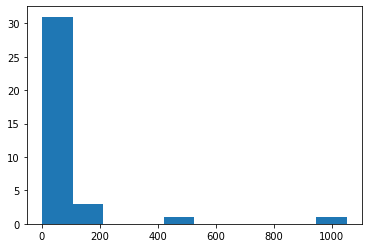

In [13]:
gaps_test, _ = df_gap(dataframe2[6])
plt.hist(gaps_test)
plt.plot()

## Gaps count total

In [14]:
DIR1, DIR2 = "../files/pickles/1/","../files/pickles/2/"
FILES1, FILES2 = [], []
for root, dir, files in os.walk(DIR1, topdown=False):
    for file in sorted(files):
        FILES1.append(os.path.join(root, file))
for root, dir, files in os.walk(DIR2, topdown=False):
    for file in sorted(files):
        FILES2.append(os.path.join(root, file))
#rint(FILES1 + FILES2)
FILES = FILES2

names, gaps_list, gaps_count, tot_missing_val, proportion = [], [], [], [],[]
allgaps, totaldfwithgap, totaldf = [], 0, 0
for i, pickled_dfs in enumerate(FILES2):
    with open(pickled_dfs, "rb") as f:
        compressed_pickle = f.read()
    depressed_pickle = blosc.decompress(compressed_pickle)
    dfs = pickle.loads(depressed_pickle)
    #print(pickled_dfs)
    #print("The input file {} contains {} trials.".format(pickled_dfs ,len(dfs)))
    gaps_meanslist = []
    maxes = []
    for j, d in enumerate(dfs):
        totaldf += 1
        gaps, _ = df_gap(d)
        gaps_meanslist.append(round(np.mean(gaps),0))
        #print('{} gaps for a total of {} missing values representing {}% of the values.'
        #    .format(len(gaps), np.sum(gaps),round(np.sum(gaps)/len(d)*100, 2)))
        names.append('file'+str(i)+'.'+str(j)), gaps_list.append(gaps), gaps_count.append(len(gaps)) 
        tot_missing_val.append(np.sum(gaps)), proportion.append(round(np.sum(gaps)/len(d)*100, 2))

        if len(gaps)>0: 
            maxes.append(max(gaps))
            allgaps.append(round(np.sum(gaps)/len(d)*100, 0))
            totaldfwithgap += 1


print('Dataframes with gaps :{}, total dataframes : {}'.format(totaldfwithgap, totaldf))
print('Mean % of NaNs over the 29 dataframes', np.mean(allgaps))

Dataframes with gaps :29, total dataframes : 29
Mean % of NaNs over the 29 dataframes 18.75862068965517


Dataframe to sum up the missing values count. The missing values % represent the % of the total values of a trial that are NaNs

In [15]:
df_gaps_tot = pd.DataFrame(list(zip(names, gaps_list, gaps_count, tot_missing_val, proportion )), 
                            columns=['f name', 'gaps', 'gaps count', 'missing values', 'missing values %'])
df_gaps_tot

,f name,gaps,gaps count,missing values,missing values %
0,file0.0,"[535, 49, 49, 48, 49, 141, 12, 16, 126, 50, 76...",187,29897,42.39
1,file1.0,"[114, 6, 4, 4, 141, 170, 48, 16, 22, 4, 16, 24...",56,3743,7.72
2,file2.0,"[32, 32, 78, 10, 4, 4, 14, 14, 2, 68, 18, 4, 1...",59,3244,13.47
3,file3.0,"[156, 12, 112, 12, 119, 8, 146, 12, 2, 154, 2,...",87,7082,29.99
4,file4.0,"[781, 49, 49, 49, 49, 49, 49, 12, 4, 18, 60, 4...",67,5596,22.05
5,file5.0,"[62, 508, 204, 2, 14, 2, 2, 12, 248, 50, 30, 7...",99,10008,37.91
6,file6.0,"[128, 150, 112, 40, 36, 130, 8, 68, 18, 46, 6,...",34,2975,11.58
7,file7.0,"[32, 6, 26, 6, 1, 3, 1, 9, 1, 1, 39, 2, 3, 18,...",146,1573,19.92
8,file8.0,"[273, 32, 91, 1, 37, 10, 24, 10, 21, 3, 34, 4,...",19,573,47.59
9,file9.0,"[204, 162, 156, 276]",4,798,16.85


These statistics and animations can be automatically computed for any CSV file.

## Filling the NAs rows

Dataframe with only gaze X,Y and Time

In [16]:
df = dataframe2[1]
df = df[['Gaze_X', 'Gaze_Y', 'Frame time (s)']]
#for i in range (0,len(df[0]),100):
nona_len = len(df.dropna())

# Original df with the NANs : 
df
df_sub = df.loc[df['Gaze_X'].isna() ]
arridx = list(df_sub.index)
for i,j in enumerate(arridx[:-1]):
    if arridx[i]+1 != arridx[i+1]:
        print(j, arridx[i+1])


35 52
53 1615
1908 1915
1924 2685
3002 3009
3020 3033
3036 5258
5401 5882
6039 7184


Which means we have NANs from 0 to 35, from 52 to 53, ....,  from 7184 to end

In [17]:
def df_gap2(df):
    array = [0]
    df_sub = df.loc[df['Gaze_X'].isna()]
    arridx = list(df_sub.index)
    for i,j in enumerate(arridx[:-1]):
        if arridx[i]+1 != arridx[i+1]:
            array.append(j)
            array.append(arridx[i+1])

    array.append(arridx[-1])

    na_array = []
    for i in range(1, len(array), 2):
        #print(i)
        na_array.append(array[i]-array[i-1])
    return na_array, array

In [18]:
df_gap2(df)

([35, 1, 293, 9, 317, 11, 3, 143, 157, 1],
 [0,
  35,
  52,
  53,
  1615,
  1908,
  1915,
  1924,
  2685,
  3002,
  3009,
  3020,
  3033,
  3036,
  5258,
  5401,
  5882,
  6039,
  7184,
  7185])

Listing the consecutives NAs

In [19]:
# Since X and Y are NAs at the same time, taking either is the same count
na_groups = df['Gaze_X'].notna().cumsum()[df['Gaze_X'].isna()]
lengths_consecutive_na = na_groups.groupby(na_groups).agg(len)
#longest_gap = lengths_consecutive_na.max()
lengths_consecutive_na

Gaze_X
0        36
16        2
1577    294
1583     10
2343    318
2349     12
2361      4
4582    144
5062    158
6206      2
Name: Gaze_X, dtype: int64

Starting from 0 we have 204 NANs, then 8 good values, then 162 NANs, then ...   

In [20]:
sum(lengths_consecutive_na)

980

In [21]:
#df.iloc[203]
df.iloc[204]

Gaze_X           -0.217251
Gaze_Y            0.369808
Frame time (s)    0.204000
Name: 204, dtype: float64

Not using the median filter from scipy because of inconsistencies in NANs handling

In [22]:
# newdf = pd.DataFrame()
# newdf['filt X'] = median_filter(df['Gaze_X'],7)
# newdf['filt Y'] = median_filter(df['Gaze_Y'],7)
# newdf['Frame time (s)'] = median_filter(df['Frame time (s)'],7)

nanmedian from numpy ignore nans values

In [23]:
def medfilt(df, f):
    """ df: raw dataframe
        f: filter size, in both directions
    """
    newdf = pd.DataFrame()
    arrx, arry = [], []
    for i in range(len(df)):
        arrx.append(np.nanmedian(df['Gaze_X'][i-f:i+f]))
        arry.append(np.nanmedian(df['Gaze_Y'][i-f:i+f]))
    newdf['X filter'], newdf['Y filter'] = arrx, arry
    newdf['Frame time (s)'] = df['Frame time (s)']

    return newdf


In [24]:
file1 = "../files/utf8_2/Visually_Guided_Reaching_-_Child__4_target_-_LEFT_-_10_06.csv"
file2 = "../files/utf8_2/Visually_Guided_Reaching_-_Child__4_target_-_LEFT_-_10_07.csv"
file3 = "../files/utf8_2/Object_Hit_-_Child_-_RIGHT_-_10_28.2.csv"

In [25]:
df = extract_dataframes(file3, set=2)[0]
# df_sub = df.loc[df['Gaze_X'].isna()]
# arridx = list(df_sub.index)
# print(arridx)

medfilt(df, 7)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


,X filter,Y filter,Frame time (s)
0,NaN,NaN,0.000000
1,NaN,NaN,0.005000
2,NaN,NaN,0.010000
3,NaN,NaN,0.015000
4,NaN,NaN,0.020000
...,...,...,...
7893,-0.122609,0.423459,39.465000
7894,-0.122782,0.423884,39.470001
7895,-0.122869,0.423946,39.474998
7896,-0.122957,0.424008,39.479999


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


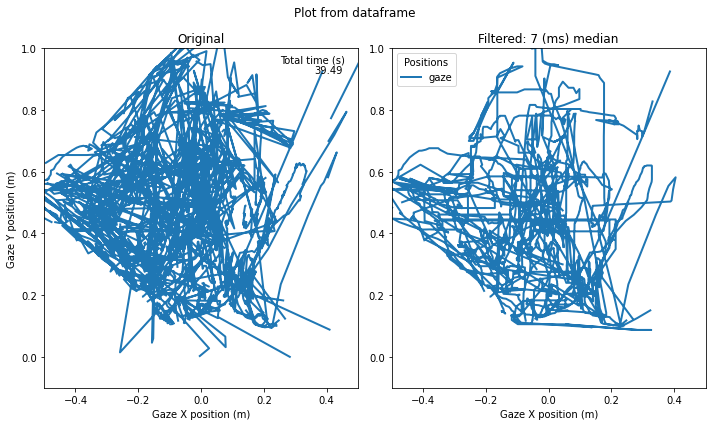

In [26]:
anim.static_simple_medfilt(df, medfilt(df, 7), plot=True, save=False, filename='paperdraft')

In [27]:
filt_df = medfilt(dataframe2[1], 7)
na_groups = filt_df['X filter'].notna().cumsum()[filt_df['X filter'].isna()]
na_groups.groupby(na_groups).agg(len)

X filter
0        30
1592    281
2381    305
4649    131
5142    145
Name: X filter, dtype: int64

In [28]:
lengths_consecutive_na2 = na_groups.groupby(na_groups).agg(len)
sum(lengths_consecutive_na2)

892

From 980 NAs we are now at 892 with this filtering.  
With more filtering ? (30)

In [29]:
filt_df2 = medfilt(dataframe2[1], 30)
na_groups = filt_df2['X filter'].notna().cumsum()[filt_df2['X filter'].isna()]
lengths_consecutive_na3 = na_groups.groupby(na_groups).agg(len)
sum(lengths_consecutive_na3)

708

Lower, as expected

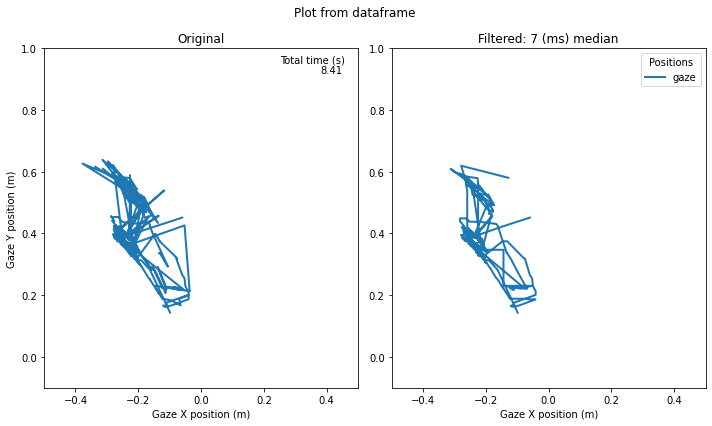

In [30]:
anim.static_simple_medfilt(dataframe2[1], filt_df, plot=True, save=False)
#         trial = Trial(dfs[i], filename)
#         print(trial.duration)
#         for s in FILTERS:
#             #anim.animate_gaze_single_medfilt(trial, plot=True, save=False, filter=s, speed=1, filename=f[16:21]+str(s))
#             anim.static_gaze_single_medfilt(trial, plot=False, save=True, filter=s,filename=f[16:21]+str(s))
#     #plt.close()